In [1]:
import os
import glob
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import pandas as pd
import seaborn as sns
import copy
import pickle


%matplotlib inline

In [2]:
working_directory = r"D:\Files_Reutlingen_Jenny\19-04-16\190416_paper\spike_extraction_convolved_lowpass"

output_directory = r"D:\Files_Reutlingen_Jenny\19-04-16\190416_paper\new_analysis_02_HCx_GFP_B_hCSF_convolved"

In [3]:
os.chdir(working_directory)

In [4]:
filename= '02_HCx_GFP_B_hCSF'

In [5]:
Basics = {}
Infos_Recording = {}
Infos_Analysis = {}
Infos_Anatomy = {}
main_recording_dictionary ={}

In [6]:
medium = 'hCSF'
recordingdate = '16.04.2019'

In [7]:
Infos_Recording['medium']=medium


In [8]:
folderlist = glob.glob(filename+'*')

In [9]:
folderlist

['02_HCx_GFP_B_hCSF_from_600_to_720_analyzed_on_20102021']

In [10]:
folderlist

['02_HCx_GFP_B_hCSF_from_600_to_720_analyzed_on_20102021']

In [48]:
# get into every folder and find the dictionaries
# replace them in a two meta-dictionaries (infodics and spikedics)
infodics = {}
spikedics = {}

for folder in folderlist:
    os.chdir(os.path.join(working_directory, folder))
    timekey = folder.split('_')[6:9]
    timekey = '_'.join(timekey)
    
    # load the info_dic_file
    info_dic_filename = glob.glob('*info*npy')
    print(info_dic_filename)
    print(os.getcwd())
    info_dic = np.load(info_dic_filename[0], allow_pickle=True).item()
    infodics[timekey] = info_dic
    
    # load the spikedic_file
    spike_dic_filename = glob.glob('*spikes_MAD*')[0]
    spikedic_MAD = np.load(spike_dic_filename, allow_pickle=True).item()
    spikedics[timekey] = spikedic_MAD
    


['02_HCx_GFP_B_hCSF.h5_600_720_info_dict.npy', 'infodics_02_HCx_GFP_B_hCSF.npy']
D:\Files_Reutlingen_Jenny\19-04-16\190416_paper\spike_extraction_convolved_lowpass\02_HCx_GFP_B_hCSF_from_600_to_720_analyzed_on_20102021


In [49]:
infodics

{'600_to_720': {'tick': 40,
  'timelengthrecording_s': 1800.0,
  'timelengthrecording_ms': 1800000000,
  'first_recording_timepoint': 0,
  'scale_factor_for_second': 1e-06,
  'time_in_sec': array([600.     , 600.00004, 600.00008, ..., 719.99992, 719.99996,
         720.     ]),
  'sampling_frequency': 25000}}

In [50]:
info_dic = np.load(info_dic_filename[0], allow_pickle=True).item()

In [51]:
np.save('infodics_'+filename+'.npy', infodics)

In [52]:
infodics = np.load("infodics_"+filename+".npy", allow_pickle=True).item()

In [53]:
info_dic = infodics["600_to_720"]

In [54]:
infodics

{'600_to_720': {'tick': 40,
  'timelengthrecording_s': 1800.0,
  'timelengthrecording_ms': 1800000000,
  'first_recording_timepoint': 0,
  'scale_factor_for_second': 1e-06,
  'time_in_sec': array([600.     , 600.00004, 600.00008, ..., 719.99992, 719.99996,
         720.     ]),
  'sampling_frequency': 25000}}

In [55]:
Infos_Recording = {}
Infos_Recording['info_dics_subrecordings'] = infodics
Infos_Recording['recordings_date'] = recordingdate
Infos_Recording['timelengthrecording_s'] = info_dic['timelengthrecording_s']
#recording lenght 



In [56]:
os.getcwd()

'D:\\Files_Reutlingen_Jenny\\19-04-16\\190416_paper\\spike_extraction_convolved_lowpass\\02_HCx_GFP_B_hCSF_from_600_to_720_analyzed_on_20102021'

In [57]:
with open(os.path.join(output_directory+'\\infodics_'+filename+'.pkl'), 'wb') as f:
    pickle.dump(infodics, f)

We now have the a dictionary of dictionaries for the info-dic and a dictionary of dictionaries for the spikedics.

Next, we want to rejoin the subdictionaries again.
    

In [58]:
# we gather the general information
infodic = infodics["600_to_720"]

tick = infodic['tick']
# the timelength recording must be set to 120 seconds if we observe
timelengthrecording_s = 120
first_recording_timepoint = infodic['first_recording_timepoint']
scale_factor_for_second = infodic['scale_factor_for_second']




In [59]:
Infos_Recording['scale_factor_for_second'] = scale_factor_for_second
Infos_Recording['tick'] = tick

In [60]:
# cross this out if you want them in the original directory
os.chdir(output_directory)

## Join a Subdivied Recording and prepare the analysis for the whole Recordings

Since threshold extraction of spikes is computationally extensive, we subidivided the original recording into two minute sets. We now want to rejoin these two minute sets and repeat the analysis as above:



In [61]:
filename = filename+'_completerecording'

In [62]:
infodic

timelengthrecording_s = info_dic['timelengthrecording_s']

In [63]:
info_dic

{'tick': 40,
 'timelengthrecording_s': 1800.0,
 'timelengthrecording_ms': 1800000000,
 'first_recording_timepoint': 0,
 'scale_factor_for_second': 1e-06,
 'time_in_sec': array([600.     , 600.00004, 600.00008, ..., 719.99992, 719.99996,
        720.     ]),
 'sampling_frequency': 25000}

In [64]:
spikedics

{'600_to_720': {'R12': array([15002827, 15010405, 15024213, 15033186, 15033754, 15039473,
         15045728, 15052867, 15063266, 15063411, 15063974, 15064481,
         15079709, 15080305, 15088746, 15090876, 15092861, 15100278,
         15108542, 15114755, 15122232, 15122276, 15132854, 15134731,
         15136294, 15136338, 15137720, 15146881, 15149160, 15153224,
         15156223, 15160792, 15166863, 15166919, 15176215, 15176919,
         15177432, 15182765, 15188630, 15193271, 15195952, 15205604,
         15208090, 15209103, 15210243, 15212458, 15223057, 15228594,
         15238591, 15242673, 15243163, 15243831, 15244040, 15244773,
         15245320, 15253670, 15263730, 15274800, 15279327, 15280229,
         15284014, 15289550, 15302041, 15312457, 15312526, 15313883,
         15321780, 15327688, 15334098, 15338650, 15349235, 15354198,
         15354877, 15360830, 15372933, 15380573, 15385548, 15386785,
         15390717, 15407836, 15411901, 15413074, 15421300, 15427764,
         1543

The spikedics we use are already containting spikes in the original tick value.
That means for the subdivided dictionaries the spiketrains don't start at zero again but when the subdivided dictionary starts.

In [65]:
timekeys = list(spikedics.keys())
channelkeys = list(spikedics[timekeys[0]].keys())

In [66]:
# we now need to use a double loop to get all dictionary keys and join them into a big full recording dictionary

spikedic_MAD_full = {}
temp_spikelist = []

for i in channelkeys:
    temp_spikelist = []
    for j in timekeys:
        spikes = list(spikedics[j][i])
        temp_spikelist.append(spikes)
    
    #join the lists
    temp_spikelista = sum(temp_spikelist, [])
    #remove the duplicates
    temp_spikelistb = list(set(temp_spikelista))
    
    #sort the list
    temp_spikelistc = sorted(temp_spikelistb)
    
    #assign them to their channel in the full dictionary
    spikedic_MAD_full[i] = temp_spikelistc

        

In [67]:
spikedic_MAD = spikedic_MAD_full

In [68]:
main_recording_dictionary['spikedic_MAD'] = spikedic_MAD

In [69]:
np.save(filename +'_full_spikedic.npy', spikedic_MAD_full)

Now the analysis can proceed just as before for the longer recording

In [70]:
 # create an array of the spikes in scale of seconds
active_channels = 0
spikedic_seconds = {}
for key in spikedic_MAD:
    relevant_factor = timelengthrecording_s*0.05
    if len(spikedic_MAD[key])>relevant_factor:
        sec_array = np.asarray(spikedic_MAD[key])*tick*scale_factor_for_second
        spikedic_seconds[key]=sec_array
        active_channels += 1
spikearray_seconds = np.asarray(list(spikedic_seconds.values()))  

In [71]:
Basics['active_channels'] = active_channels
Basics['relevant_factor'] = relevant_factor


In [72]:
# get a 1-D array with every detected spike
scale_factor_for_milisecond = 1e-03
full_spike_list = []
full_spike_list_seconds = []
for key in spikedic_MAD:
    if len(spikedic_MAD[key])>relevant_factor:
        x = list(np.asarray(spikedic_MAD[key])*scale_factor_for_milisecond*tick)
        full_spike_list = full_spike_list + x

        xs = list(np.asarray(spikedic_MAD[key])*scale_factor_for_second*tick)
        full_spike_list_seconds = full_spike_list_seconds + xs
full_spikes = sorted(full_spike_list)
full_spikes_seconds = sorted(full_spike_list_seconds)

In [73]:
mean_fr_whole_recording = np.around((len(full_spikes_seconds) / timelengthrecording_s), 3)

In [74]:
mean_fr_whole_recording

106.045

In [75]:
Basics['mean_fr_whole_recording'] = mean_fr_whole_recording

In [76]:
Basics

{'active_channels': 183,
 'relevant_factor': 90.0,
 'mean_fr_whole_recording': 106.045}

In [77]:
#define bins 
binsize = 0.005 #seconds
bins= np.arange(0, timelengthrecording_s+binsize, binsize)

# make a histogram 
full_spikes_binned = np.histogram(full_spikes_seconds, bins)[0]


#trial of population burst plot as inspired by Andrea Corna
bins = int(timelengthrecording_s / binsize)+1

firing_rate_histogram = np.histogram(full_spikes_seconds, bins=bins)
firing_rate = firing_rate_histogram[0]*200 #conversion to hertz

In [122]:
def gaussian_smoothing(y, window_size=10, sigma=2):

    filt = signal.gaussian(window_size, sigma)

    return signal.convolve(y, filt, mode='full')

In [123]:
len(np.ones(N)/N)

200

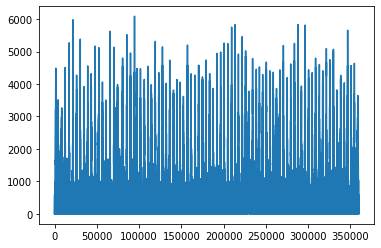

In [134]:
N = int(1/binsize) # für eine Secunde, das Sliding window, also letztlich number of bins

# gaussian smmothing fo the firing rate and moving average
fr_gau = gaussian_smoothing(firing_rate)
ma_fr_gau = np.convolve(fr_gau, np.ones(N)/N, mode='valid')
plt.plot(fr_gau)

In [135]:
len(fr_gau)

360010

In [136]:
# we look for the mean of the MA as threshold
# we arrange this mean in an array for plotting
mean_ma_fr_gau = np.mean(ma_fr_gau)
std_ma_fr_gau = np.std(ma_fr_gau)
network_burst_threshold = mean_ma_fr_gau + 1*std_ma_fr_gau
shape_for_threshold = np.shape(ma_fr_gau)
network_burst_threshold_array = np.full(shape_for_threshold, network_burst_threshold)

### Network-Bursts Extraction in Seconds.

These Network Bursts will be the seconds we search for IID vs SPA.

In [137]:
# now we identify the burts from the network and will extract an array with 
# tuples containing the burst start and end times
bursts= []
burst_start = []
burst_seconds_start = []
burst_end = []
burst_seconds_end = []
for index in range(0, len(ma_fr_gau[:-N])):
    if ma_fr_gau[index+N] > network_burst_threshold:
        if ma_fr_gau[index+N-1] <= network_burst_threshold:
            burst_start.append(index+N)
            burst_seconds_start.append((index+N)*0.005)
        if index == 0:
            burst_start.append(0)
            burst_seconds_start.append((index+N)*0.005)
    else:
        if (ma_fr_gau[index+N-1] > network_burst_threshold) and (len(burst_start)>0):
            if index+N > len(ma_fr_gau):
                ending = len(ma_fr_gau)
            else: 
                ending = index + N

            burst_end.append(ending)
            burst_seconds_end.append((ending)*0.005)
bursts = list(zip(burst_start, burst_end))
bursts_seconds = list(zip(burst_seconds_start, burst_seconds_end))    

In [132]:
main_recording_dictionary['network_bursts_seconds'] = bursts_seconds

<ipython-input-133-6e1cc936eda7>:6: MatplotlibDeprecationWarning: "color" keyword argument will be ignored
  axs[1].eventplot(spikearray_seconds, color = 'black', linewidths = 0.01,


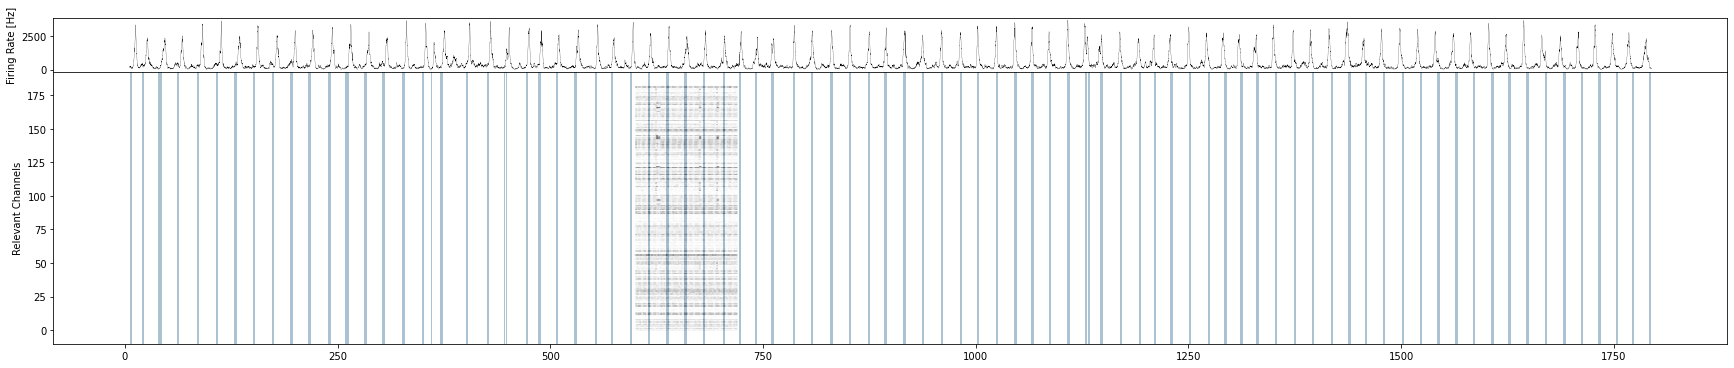

In [133]:
fig = plt.figure(figsize = (30,6))
gs = fig.add_gridspec(2, hspace = 0, height_ratios=[1,5])
axs = gs.subplots(sharex=False, sharey=False)
axs[0].plot(ma_fr_gau, color= 'black', linewidth = 0.2)
axs[0].set_ylabel('Firing Rate [Hz]')
axs[1].eventplot(spikearray_seconds, color = 'black', linewidths = 0.01,
                 linelengths = 1, colors = 'black')
axs[1].set_ylabel('Relevant Channels')

for ax in axs:
    for i in bursts_seconds:
        axs[1].axvspan(i[0], i[1], facecolor = '#5B89A6', alpha = 0.3)
#fig.savefig(filename+ '__raster_firingrate_plot.png', dpi=300)

In [86]:
# and lastly for the whole recording

whole_recording_firingrate_dic = {}

for key in spikedic_MAD:
    fr_channel = len(spikedic_MAD[key])/timelengthrecording_s # i.e, number of spikes divided by duration -> results in number per second
    whole_recording_firingrate_dic[key] = fr_channel

In [87]:
main_recording_dictionary['fr_dic'] = whole_recording_firingrate_dic

In [88]:
# for plotting with sns heatmap we need a df first 

# this is done as empty df:

mea_array=np.empty((16,16,))
mea_array[:]=np.nan
columnlist =['A','B','C','D','E','F','G','H','I','K','L','M','N','O','P','R']
df = pd.DataFrame(data=mea_array,columns=columnlist)
df.index+=1

In [89]:
plotframe = copy.deepcopy(df)

In [90]:
plotframe_filled = get_dict_values(plotframe, whole_recording_firingrate_dic)

NameError: name 'get_dict_values' is not defined

NameError: name 'plotframe_filled' is not defined

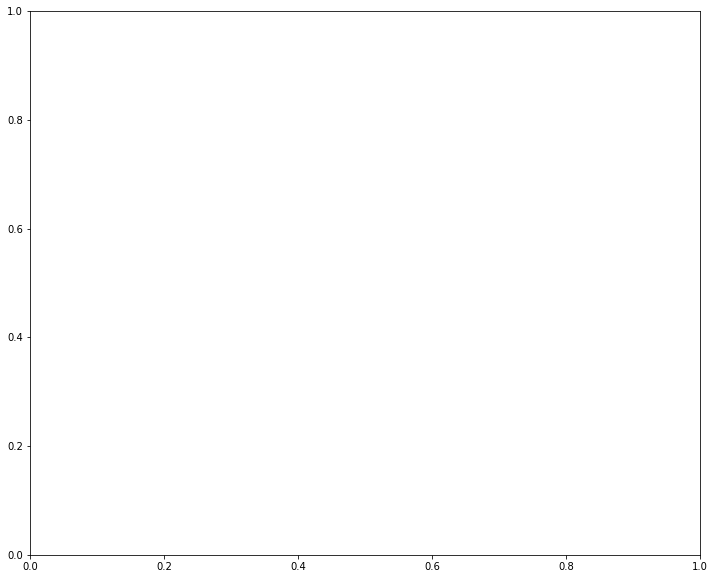

In [91]:
f, ax = plt.subplots(1, 1, figsize = (12,10))

sns.heatmap(plotframe_filled, annot=False, linewidths=.5, ax=ax, cmap="flare")
ax.set_title('firing/Channel ' + filename + ' Mean FR Active: {}, active channels: {}'.format(mean_fr_whole_recording, active_channels))

#f.savefig(filename+'whole_MEA_Heatmap.png', dpi = 300, bbox_inches = 'tight')

In [92]:
# normalize the plotframe:

plotframe_normalized =(plotframe_filled-plotframe_filled.mean().max())/plotframe_filled.mean().std()

NameError: name 'plotframe_filled' is not defined

NameError: name 'plotframe_normalized' is not defined

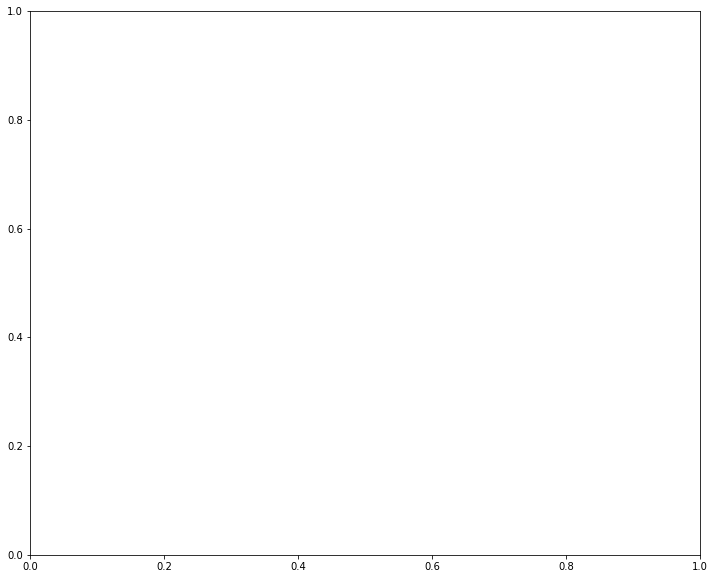

In [93]:
f, ax = plt.subplots(1, 1, figsize = (12,10))

sns.heatmap(plotframe_normalized, annot=False, linewidths=.5, ax=ax, cmap="flare")
ax.set_title('firing/Channel ' + filename + 'Normalized Mean FR Active: {}, active channels: {}'.format(mean_fr_whole_recording, active_channels))

f.savefig(filename+'whole_MEA_Heatmap_normalized.png', dpi = 300, bbox_inches = 'tight')

## basic spiking statistics

next from the whole 20 minute recording we want to calculate the average ISI intervals of the relevant channels and ISI standard deviations for every channel

In [94]:
def get_isi_single_channel(spikedic):
    
    '''
    input: 
        spikedic with keys = channellabels, values = spiketimes in raw ticks
    
    
    returns: 

        dictionary with keys = channellabels, values = isi per channel in miliseconds
        
        
    nota bene:
        the amount of spikes is not filtered, we still need to factor out non relevant channels
    
    '''
    
    # set the empty dictionary and temporary list
    isi_dictionary = {}
    isi_temp_list =[]
    
    
    for key in spikedic:
        isi_temp_list =[]
        spikes = spikedic[key]
        spikes = [spike * tick * scale_factor_for_milisecond for spike in spikes]
        
        if len(spikes) >= 2:
            for i in range(0, len(spikes)-1): 

                # calculate the isi
                isi =  spikes[i+1] - spikes[i] 
                isi_temp_list.append(isi)

        isi_dictionary[key] = isi_temp_list
        
    
    return isi_dictionary
        

In [95]:
# create the dictionary with isi
isi_dictionary = get_isi_single_channel(spikedic_MAD_full)


In [96]:
main_recording_dictionary['isi_dictionary'] = isi_dictionary

In [97]:
# now we get the average isi and isi std

# creating list to easily calculate the whole mean and std
isi_averages = []
isi_standarddeviations = []

# creat dictionaries to do the same for every channel
isi_average_dic = {}
isi_standarddeviations_dic = {}



for key in isi_dictionary:
    if len(isi_dictionary[key]) > relevant_factor:
        
        # for the relevant channels we attain the mean
        mean_isi = np.mean(isi_dictionary[key])
        isi_averages.append(mean_isi)
        
        # and the standard deviation
        std_isi = np.std(isi_dictionary[key])
        isi_standarddeviations.append(std_isi)
        
        isi_average_dic[key] = mean_isi
        isi_standarddeviations_dic[key] = std_isi
        
        
        
mean_isi_relevant_channels = np.mean(isi_averages)
mean_isi_std = np.mean(isi_standarddeviations)

In [98]:
main_recording_dictionary['isi_average_dic'] = isi_average_dic

In [99]:
# now we get the average isi and isi std

# creating list to easily calculate the whole mean and std
isi_averages = []
isi_standarddeviations = []

# creat dictionaries to do the same for every channel
isi_average_dic = {}
isi_standarddeviations_dic = {}

for key in isi_dictionary:
    if len(isi_dictionary[key]) > relevant_factor:
        
        # for the relevant channels we attain the mean
        mean_isi = np.mean(isi_dictionary[key])
        isi_averages.append(mean_isi)
        
        print(mean_isi)

226.63333333333338
81.23007477906182
316.57665782493376
104.704020979021
77.10992898644288
253.603821656051
77.64956351791535
214.08351885098747
87.17146181818183
875.8267647058819
696.7553216374271
347.21551020408174
43.573605839416075
76.35551856594114
1239.1676595744682
446.8904868913858
527.03203539823
916.1661538461536
51.039435414884544
100.78483108108108
57.9406501698205
403.01121621621604
209.94436619718314
146.12399512789287
81.8486301369863
135.40245454545445
436.8561172161171
75.75413771320281
69.69594862813778
46.310954228083794
54.03534631054774
79.69543812709034
161.36351826792966
117.36660117878199
87.31604395604397
81.06247619047616
676.7000000000004
500.3487394957983
63.578528784648164
152.28882653061217
107.5684115523465
853.5307246376811
51.99808612440196
143.68428915662645
82.84063844552394
349.9429411764705
181.54155725190836
293.0657142857144
551.8364976958526
77.87812133072408
68.24611872146123
68.6579736691471
365.190153846154
86.44669069935115
118.6536246276067

In [100]:
isi_dictionary

{'R12': [303.12000000011176,
  552.3199999999488,
  358.9200000000419,
  22.71999999997206,
  228.7600000000093,
  250.19999999995343,
  285.5600000000559,
  415.95999999996275,
  5.800000000046566,
  22.51999999990221,
  20.28000000002794,
  609.1199999999953,
  23.84000000008382,
  337.63999999989755,
  85.20000000006985,
  79.40000000002328,
  296.6799999999348,
  330.5600000000559,
  248.52000000001863,
  299.0799999999581,
  1.7600000000093132,
  423.11999999999534,
  75.07999999995809,
  62.52000000001863,
  1.7600000000093132,
  55.28000000002794,
  366.4399999999441,
  91.1600000000326,
  162.55999999993946,
  119.96000000007916,
  182.7600000000093,
  242.8399999999674,
  2.2399999999906868,
  371.8399999999674,
  28.160000000032596,
  20.520000000018626,
  213.31999999994878,
  234.60000000009313,
  185.63999999989755,
  107.23999999999069,
  386.0800000000745,
  99.43999999994412,
  40.52000000001863,
  45.59999999997672,
  88.60000000009313,
  423.95999999996275,
  221.4799

In [101]:
mean_isi_std

401.9754397419216

In [102]:
mean_fr_whole_recording

106.045

In [103]:
active_channels

183

## reference to the anatomy



In [104]:
#layerdic 16.04.2019 B!!!
layerdic = {'layer1':[], 
            'layer2-3': ['F1', 'G1', 'H1', 'I1', 'K1', 'L1', 'M1', 'N1', 'O1', 'P1', 'H2', 'I2', 'K2', 'L2', 
                         'M2', 'N2', 'O2', 'P2', 'R2', 'K3', 'L3', 'M3', 'N3', 'O3', 'P3', 'R3', 'L4', 'M4', 
                         'N4', 'O4', 'P4', 'R4', 'N5', 'O5', 'P5', 'R5', 'P6', 'R6', 'R7'],
           'layer4':    ['D1', 'E1', 'F2', 'G2', 'G3', 'H3', 'I3', 'I4', 'K4', 'L5', 'M5', 'M6', 'N6', 'O6', 
                         'O7', 'P7', 'P8', 'R8'],
                         
           'layer5-6':  ['B1', 'C1', 'A2', 'B2', 'C2', 'D2', 'E2', 'A3', 'B3', 'C3', 'D3', 'E3', 'F3',
                         'A4', 'B4', 'C4', 'D4', 'E4', 'F4', 'G4', 'H4', 'A5', 'B5', 'C5', 'D5', 'E5', 
                         'F5', 'G5', 'H5', 'I5', 'A6', 'B6', 'C6', 'D6', 'E6', 'F6', 'G6', 'H6', 'I6', 
                         'K6', 'A7', 'B7', 'C7', 'D7', 'E7', 'F7', 'G7', 'H7', 'I7', 'K7', 'L7', 'M7', 
                         'N7', 'A8', 'B8', 'C8', 'D8', 'E8', 'F8', 'G8', 'H8', 'I8', 'K8', 'L8', 'M8', 
                         'N8', 'O8', 'B9', 'C9', 'D9', 'E9', 'F9', 'G9', 'H9', 'I9', 'K9', 'L9', 'M9', 
                         'N9', 'O9', 'P9', 'R9', 'C10', 'D10', 'E10', 'F10', 'G10', 'H10', 'I10', 'K10', 
                         'L10', 'M10', 'N10', 'O10', 'P10', 'R10', 'D11', 'E11', 'F11', 'G11', 'H11', 
                         'I11', 'K11', 'L11', 'M11', 'N11', 'O11', 'P11', 'R11', 'E12', 'F12', 'G12', 
                         'H12', 'I12', 'K12', 'L12', 'M12', 'N12', 'O12', 'P12', 'R12', 'F13', 'G13', 
                         'H13', 'I13', 'K13', 'L13', 'M13', 'N13', 'O13', 'P13', 'R13', 'G14', 'H14', 
                         'I14', 'K14', 'L14', 'M14', 'N14', 'O14', 'P14', 'R14', 'H15', 'I15', 'K15', 
                         'L15', 'M15', 'N15', 'O15', 'P15', 'R15', 'H16', 'I16', 'K16', 'L16', 'M16', 
                         'N16', 'O16', 'P16', 'R16'],
           'whitematter':['A9', 'A10', 'B10', 'A11', 'B11', 'C11', 'A12', 'B12', 'C12', 'D12', 'A13', 
                          'B13', 'C13', 'D13', 'E13', 'A14', 'B14', 'C14', 'D14', 'E14', 'F14', 'A15', 
                          'B15', 'C15', 'D15', 'E15', 'F15', 'G15', 'B16', 'C16', 'D16', 'E16', 'F16', 
                          'G16', 'H16']
                         }

In [105]:
def invert_layerdic(layer_dic):
    
    '''
    Expects a dictionary with key = layer, value = list of channellabels
    
    Returns a dictionary with key = channellabels, value = layer
    '''
    layerdic_invert = {}

    for key in layerdic:
        for i in layerdic[key]:
            layerdic_invert[i]=key
            
            
    return layerdic_invert

In [106]:
layerdic_invert = invert_layerdic(layerdic)

In [107]:
Infos_Anatomy['layerdic'] = layerdic
Infos_Anatomy['layerdic_invert'] = layerdic_invert




In [108]:
isi_standarddeviations_dic

{}

In [109]:
relevant_factor

90.0

In [110]:
Infos_Analysis['relevant_factor'] = relevant_factor

In [111]:
main_recording_dictionary.keys()

dict_keys(['spikedic_MAD', 'network_bursts_seconds', 'fr_dic', 'isi_dictionary', 'isi_average_dic'])

In [112]:
Infos_Analysis

{'relevant_factor': 90.0}

In [113]:
Infos_Anatomy.keys()

dict_keys(['layerdic', 'layerdic_invert'])

In [114]:
Infos_Recording['timelengthrecording_s'] = timelengthrecording_s

In [115]:
main_recording_dictionary['Infos_Recording'] = Infos_Recording
main_recording_dictionary['Infos_Analysis'] = Infos_Analysis
main_recording_dictionary['Infos_Anatomy'] = Infos_Anatomy

In [116]:
main_recording_dictionary.keys()

dict_keys(['spikedic_MAD', 'network_bursts_seconds', 'fr_dic', 'isi_dictionary', 'isi_average_dic', 'Infos_Recording', 'Infos_Analysis', 'Infos_Anatomy'])

In [117]:
# save the main_recording_dictionary
filename= '02_HCx_GFP_B_hCSF'
with open(os.path.join(output_directory+'/MAIN_RECORDING_Dictionary_'+filename+'.pkl'), 'wb') as f:
          pickle.dump(main_recording_dictionary, f)

In [118]:
output_directory

'D:\\Files_Reutlingen_Jenny\\19-04-16\\190416_paper\\new_analysis_02_HCx_GFP_B_hCSF_convolved'

In [119]:
os.path.join(output_directory, '\\MAIN_RECORDING_Dictionary.pkl')

'D:\\MAIN_RECORDING_Dictionary.pkl'

In [120]:
output_directory

'D:\\Files_Reutlingen_Jenny\\19-04-16\\190416_paper\\new_analysis_02_HCx_GFP_B_hCSF_convolved'

In [121]:
filename

'02_HCx_GFP_B_hCSF'